# M4P03 Final Project
## Supervised Classification Model to predict Injury Severity from Vehicle Crashes
-------------------------------------------------------------------

**Summary/Objective: <br>** 
This project involves building a classification model to predict the severity of injuries from vehicle crashes. The dataset contains information such as the type of weather, extent of vehicle damage, speed limit, driver fault, etc. Various machine learning models will be evaluated to determine the best model for predicting injury severity. The goal is to determine the most accurate model and deploy it for future predictions of traffic accident severity. After choosing a final model, the final model will be deployed in a Streamlit app to make a prediction.

**Reference link for dataset: <br>** 
https://catalog.data.gov/dataset/crash-reporting-drivers-data

**Dataset (.csv) file name: <br>**
- Crash_Reporting_-_Drivers_Data.csv

**Interactive Python Notebook file (Data cleaning, Model Training, Model Evaluation, Saving Final Model, etc.):**
- M4P03 Final Project.ipynb <br>

**App Python file used to run code for Streamlit app: <br>**
- M4P03_app.py <br> 

**Required/Imported files used for Streamlit app: <br>**
<br>
*Requirements text file:* 
- M4P03_requirements.txt <br>

*Binary Encoder (Pickle File):* 
- binary_encoder.pkl <br>

*Final Model (JOBLIB File):*
- M4P03_final_model.joblib <br>

**M4P03 Powerpoint Presentation Slides (.pptx File): <br>**
- M4P03 Final Project Powerpoint.pptx

**URLs for Streamlit app:** <br>
Local URL: http://localhost:8501 <br>
Network URL: http://10.0.0.201:8501 <br>


**The three classification models used are:**
1. Logistic Regression
2. Support Vector Classification (SVC)
3. Random Forest Classification
    
**The main methodologies and techniques applied in this project:**
1. Feature Engineering and Data Preprocessing
2. Classification Models (Logistic Regression, Support Vector Classification (SVC), and Random Forest Classification)
3. Hyperparameter Tuning (with GridsearchCV)
4. Model Evaluation and Comparison (Confusion Matrix and Classification Reports)    
   
**The project is split into five parts:**
1. Part 1: Data Exploration, Data Cleaning, and Data Preparation (e.g., splitting data into features and target).
2. Part 2: Model #1, Logistic Regression.
3. Part 3: Model #2, Support Vector Classification (SVC).
4. Part 4: Model #3, Random Forest Classification.
5. Part 5: Model Evaluation and Comparison, with the final model chosen based on accuracy. The selected model will be deployed and used for predictions. 

#### Part 1: EDA, Visualization, Data Cleaning, Encoding, Data Preparation (ex: Split to X and y) 

In [1]:
#1.1 Import 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1.2 Load data

crash_df = pd.read_csv("../Data/Crash_Reporting_-_Drivers_Data.csv")
crash_df

# Reference link for data set:
# https://catalog.data.gov/dataset/crash-reporting-drivers-data

C:\Users\delta\AppData\Local\Temp\ipykernel_9300\3783639106.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_df = pd.read_csv("../Data/Crash_Reporting_-_Drivers_Data.csv")


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193960,MCP2919009L,250010103,MONTGOMERY,Property Damage Crash,03/08/2025 09:00:00 PM,County Route,CHERRY HILL RD,NaN,NaN,NaN,...,Southbound,35,No,No,2016,HYUNDAI,SONATA,39.046255,-76.951938,"(39.04625492, -76.95193777)"
193961,MCP2898005V,250011243,MONTGOMERY,Injury Crash,03/14/2025 02:51:00 PM,Maryland (State) Route,FREDERICK RD (SB/L),NaN,NaN,NaN,...,Southbound,40,No,No,2024,ZNEN,SPORT EDITION,39.190642,-77.241991,"(39.19064184, -77.24199055)"
193962,MCP28930045,250004119,MONTGOMERY,Property Damage Crash,01/28/2025 10:14:00 PM,NaN,NaN,NaN,Parking Lot Way PARKING LOT OF 15730 SH...,NaN,...,NaN,0,No,Yes,2021,RAM,1500,39.114008,-77.186903,"(39.1140083, -77.1869032)"
193963,MCP299100B7,250010998,MONTGOMERY,Property Damage Crash,03/13/2025 08:34:00 AM,Crossover,NaN,NEW HAMPSHIRE AVE PIPING ROCK DR,NaN,NaN,...,Northbound,35,No,No,2024,TESLA,MODEL Y,39.096978,-77.002564,"(39.0969777, -77.00256356)"


**Reference link for data set:** <br>
https://catalog.data.gov/dataset/crash-reporting-drivers-data

In [3]:
# 1.3.1 EDA here

# Note: I commented out (added #) for some lines of code so it won't take space in the output. 
# If you want to see the output, remove the # before "print" in each line.

# Data exploration:

# View first 5 rows of df.
#print(crash_df.head())

# View last 5 rows of df.
#print(crash_df.tail())

# View descriptive statistics of the numerical columns.
#print(crash_df.describe())


# View a summary of the dataset including data types, number of non-null entries and memory usage. 
print(crash_df.info())

# View missing values in the dataset.
print(crash_df.isnull().sum())

# View data types of each column.
print(crash_df.dtypes)


# View the unique values in a column
#print(crash_df['price'].unique())

# View the count of unique values in each column
#print(crash_df.nunique())


#(Separation)---------------------------------------------------------------------------------------------------------------------

# Columns/Features considered to be removed:
# - Report Number, Local Case Number, Agency Name, Person ID, Vehicle ID, Off-Road Description: (Not predictive) 
# - Driverless Vehicle, Parked Vehicle: (Rarely relevant for injury prediction)     
# - Vehicle First Impact Location: (Hard to quantify effectively)
# - Location: (Redundant because of Lat/Long)

# Columns/Features considered to be removed due to too many missing values (> 80% or > 155172 missing values):
# 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Non-Motorist Substance Abuse', 'Circumstance'    


# All Columns/Features considered to be removed:

# 'Report Number', 'Local Case Number', 'Agency Name', 'Person ID', 'Vehicle ID', 'Off-Road Description', 'Driverless Vehicle', 'Parked Vehicle', 
# 'Vehicle First Impact Location', 'Location', 'Municipality', 'Related Non-Motorist', 'Non-Motorist Substance Abuse', 'Circumstance'   



#(Separation)---------------------------------------------------------------------------------------------------------------------

# Columns/Features considered to be kept for prediction:

# 1. Crash Circumstances:
# - Crash Date/Time, Route Type, Weather, Surface Condition, Light, Traffic Control, Collision Type, 

# 2. Driver Behavior & Risk Factors:
# - Driver At Fault, Driver Substance Abuse, Non-Motorist Substance Abuse, Driver Distracted By 

# 3. Vehicle Information:
# - Vehicle Body Type, Vehicle Movement, Vehicle Going Dir, Speed Limit, Vehicle Damage Extent

# 4. Location Data:
# - Municipality, Latitude, Longitude


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193965 entries, 0 to 193964
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  193965 non-null  object 
 1   Local Case Number              193965 non-null  object 
 2   Agency Name                    193965 non-null  object 
 3   ACRS Report Type               193965 non-null  object 
 4   Crash Date/Time                193965 non-null  object 
 5   Route Type                     175012 non-null  object 
 6   Road Name                      173248 non-null  object 
 7   Cross-Street Name              164283 non-null  object 
 8   Off-Road Description           17915 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6249 non-null    object 
 11  Collision Type                 193380 non-null  object 
 12  Weather                       

**Observations and comments from EDA:**

**Missing values:**
- Route Type, Road Name, Cross-Street Name, Off-Road Description, Municipality, Related Non-Motorist, Collision Type, Weather, Surface Condition, Light , Traffic Control, Driver Substance Abuse, Non-Motorist Substance Abuse, Injury Severity, Circumstance, Driver Distracted By, Drivers License State, Vehicle Damage Extent, Vehicle First Impact Location, Vehicle Body Type, Vehicle Movement, Vehicle Going Dir, Parked Vehicle, Vehicle Make, Vehicle Model.

**Columns with numerical values:**
- The only columns with numerical values are Speed Limit, Vehicle Year, Latitude and Longitude.
- The other columns have object/string values and will either need to be converted to be numerical or will be removed completely. 

<u>Columns/Features considered to be removed</u>:
- Report Number, Local Case Number, Agency Name, Person ID, Vehicle ID, Off-Road Description: (Not predictive) 
- Driverless Vehicle, Parked Vehicle: (Rarely relevant for injury prediction)     
- Vehicle First Impact Location: (Hard to quantify effectively)
- Location: (Redundant because of Lat/Long)

<u>Columns/Features considered to be removed due to too many missing values (> 80% or > 155172 missing values)</u>:
- 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Non-Motorist Substance Abuse', 'Circumstance'

**All Columns/Features (Total) considered to be removed:**
- 'Report Number', 'Local Case Number', 'Agency Name', 'Person ID', 'Vehicle ID', 'Off-Road Description', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle First Impact Location', 'Location', 'Municipality', 'Related Non-Motorist', 'Non-Motorist Substance Abuse', 'Circumstance'

**Columns/Features considered to be kept for prediction:**

<u>1. Crash Circumstances:</u>
- Crash Date/Time, Route Type, Weather, Surface Condition, Light, Traffic Control, Collision Type 

<u>2. Driver Behavior & Risk Factors:</u>
- Driver At Fault, Driver Substance Abuse, Non-Motorist Substance Abuse, Driver Distracted By 

<u>3. Vehicle Information:</u>
- Vehicle Body Type, Vehicle Movement, Vehicle Going Dir, Speed Limit, Vehicle Damage Extent

<u>4. Location Data:</u>
- Latitude, Longitude

All kept features which have categorical values (objects/strings) will be converted to numerical values (ie. Encoding, Mapping).

In [4]:
# 1.3.1.a Preperation for Visualization

# We have some values which are all upper case, while others are not (ex: "FATAL INJURY" and "Fatal Injury") 
# Will set the values under 'Injury Severity' to all be upper case. 

# Convert all values in the 'Injury Severity' column to uppercase
crash_df['Injury Severity'] = crash_df['Injury Severity'].str.upper()

# Verify the changes
print(crash_df['Injury Severity'].head()) 

#(Separation)------------------------------------------------------------------------------------------------------------------------------

# Convert all values in the 'Weather' column to uppercase
crash_df['Weather'] = crash_df['Weather'].str.upper()

# Verify the changes
print(crash_df['Weather'].head()) 

#(Separation)------------------------------------------------------------------------------------------------------------------------------

# Filter the crash_df to keep rows where 'Vehicle Year' is between 1938 and 2025
crash_df = crash_df[(crash_df['Vehicle Year'] >= 1938) & (crash_df['Vehicle Year'] <= 2025)]

# Display the first few rows to verify the filtering
print(crash_df['Vehicle Year'].head())


0    NO APPARENT INJURY
1    NO APPARENT INJURY
2    NO APPARENT INJURY
3    NO APPARENT INJURY
4    NO APPARENT INJURY
Name: Injury Severity, dtype: object
0    CLEAR
1    CLEAR
2    CLEAR
3    CLEAR
4    CLEAR
Name: Weather, dtype: object
0    2017
1    2012
2    2015
3    2018
4    2017
Name: Vehicle Year, dtype: int64


**Note:**

<u>To prepare for visualization the following data cleaning was done:</u>
- 'Injury Severity' column had all categorical values be converted to uppercase to prevent duplicates (ex: "FATAL INJURY" and "Fatal Injury")
- 'Weather' column had all categorical values be converted to uppercase to prevent duplicates (ex: "CLEAR" and "Clear") 
- 'Vehicle Year' column had numerical values (its years) from 0 to 9999, which does not make sense. 'Vehicle Year' was filtered to have years from 1938 and 2025.



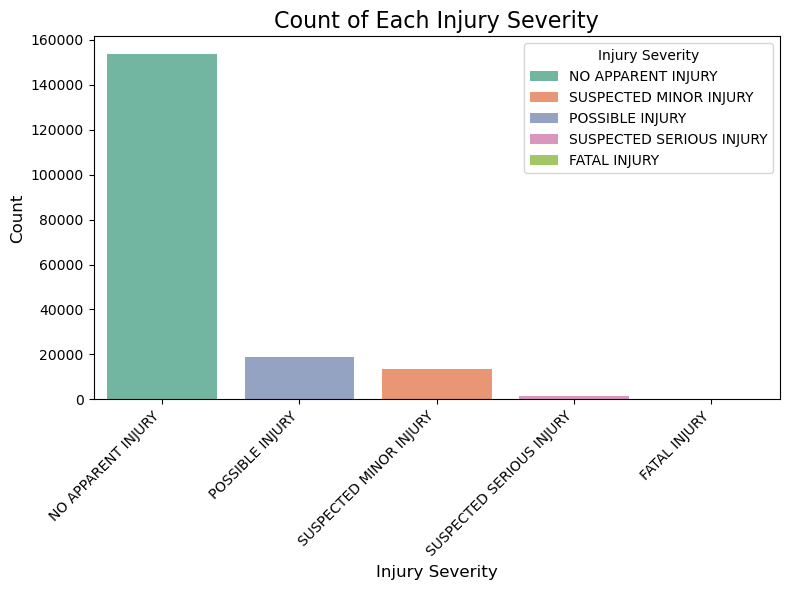

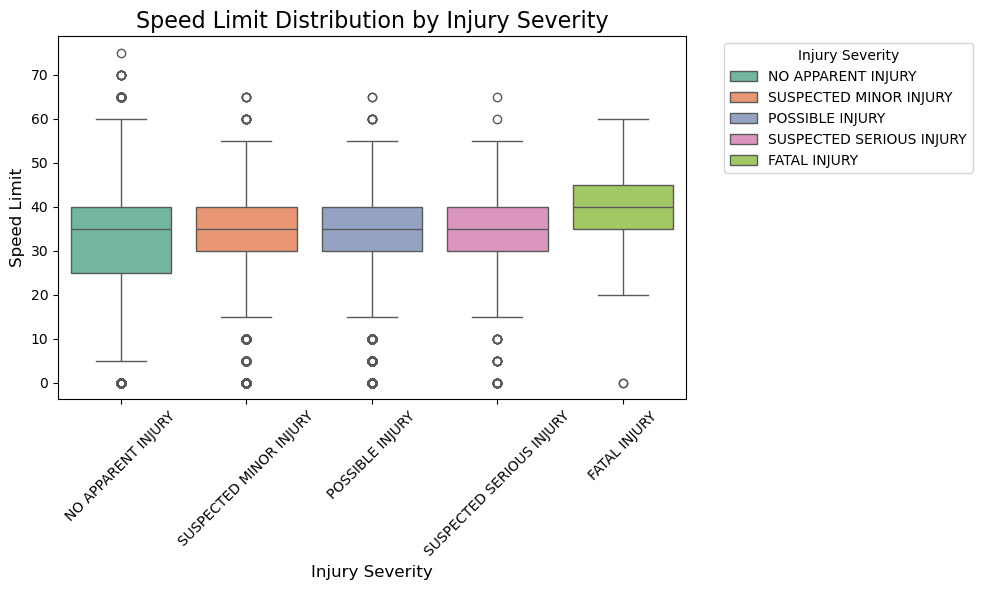

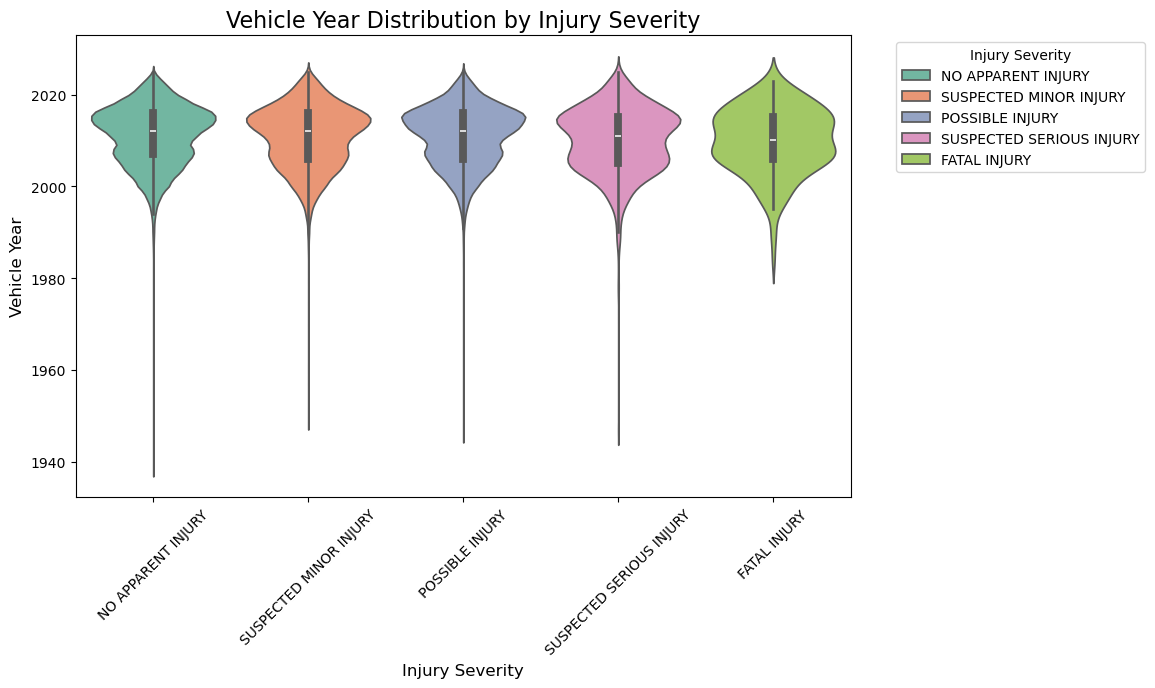

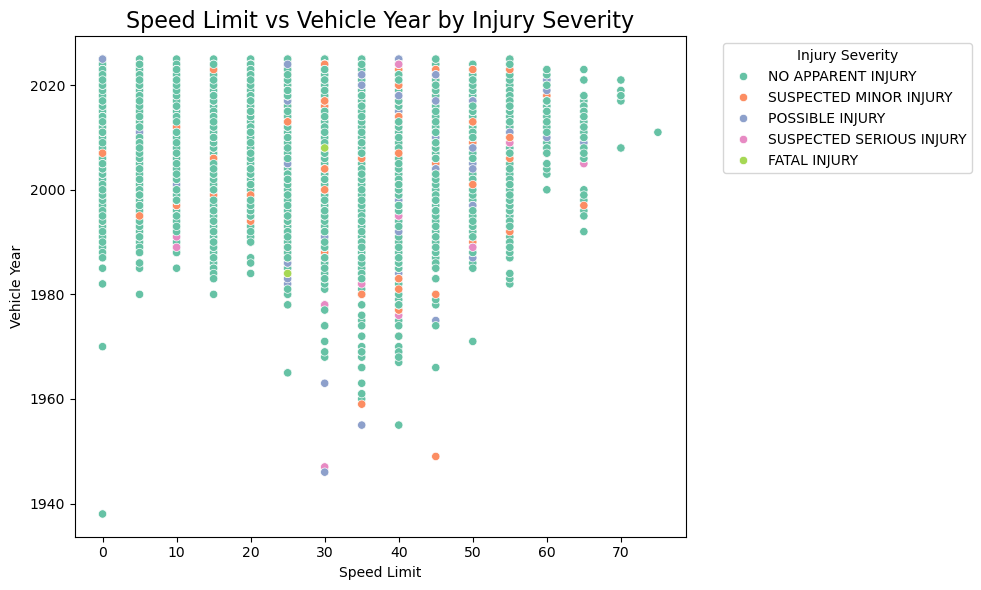

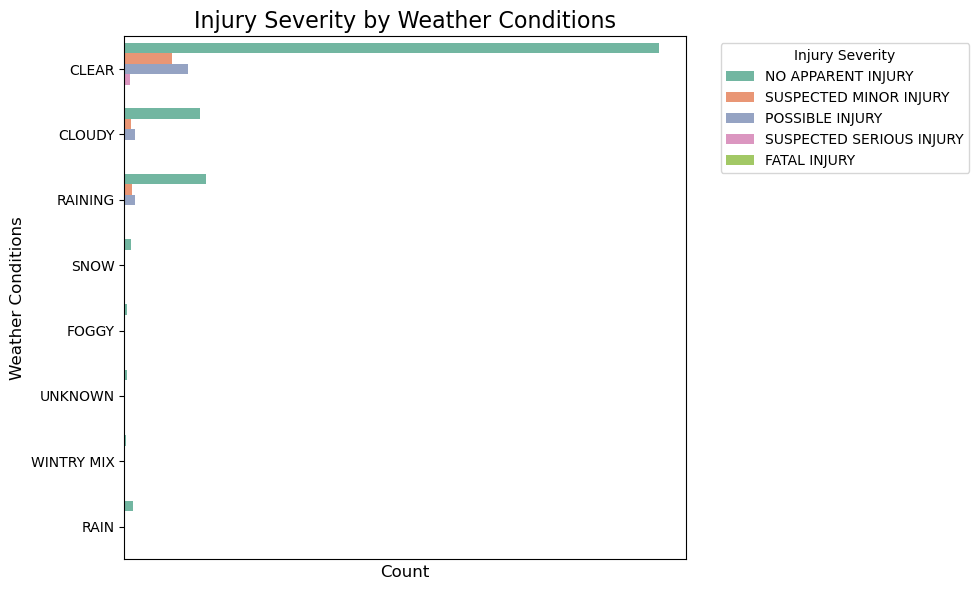

In [5]:
# 1.3.2 Visualization

#(Separation)----------------------------------Count plot for 'Injury Severity'--------------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the 'Injury Severity' column in crash_df
plt.figure(figsize=(8, 6))  
sns.countplot(x='Injury Severity', data=crash_df, order=crash_df['Injury Severity'].value_counts().index, hue='Injury Severity', palette='Set2')

# Titles and labels
plt.title('Count of Each Injury Severity', fontsize=16)
plt.xlabel('Injury Severity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  

# Display the plot
plt.tight_layout() 
plt.show()

#(Separation)-----------------------------Boxplot for 'Injury Severity' and 'Speed Limit'--------------------------------------------------------


plt.figure(figsize=(10, 6))
sns.boxplot(x='Injury Severity', y='Speed Limit', data=crash_df, hue='Injury Severity', palette='Set2')

plt.title('Speed Limit Distribution by Injury Severity', fontsize=16)
plt.xlabel('Injury Severity', fontsize=12)
plt.ylabel('Speed Limit', fontsize=12)
plt.xticks(rotation=45)

# Move the legend outside the graph
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#(Separation)-----------------------------Violin Plot for 'Injury Severity' and 'Vehicle Year'--------------------------------------------------------

plt.figure(figsize=(10, 6))
sns.violinplot(x='Injury Severity', y='Vehicle Year', data=crash_df, hue='Injury Severity', palette='Set2')

plt.title('Vehicle Year Distribution by Injury Severity', fontsize=16)
plt.xlabel('Injury Severity', fontsize=12)
plt.ylabel('Vehicle Year', fontsize=12)
plt.xticks(rotation=45)

# Move the legend outside the graph
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#(Separation)-----------------------------Scatter Plot for 'Speed Limit' and 'Vehicle Year'--------------------------------------------------------

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Speed Limit', y='Vehicle Year', hue='Injury Severity', data=crash_df, palette='Set2')

plt.title('Speed Limit vs Vehicle Year by Injury Severity', fontsize=16)

# Move the legend outside the graph
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#(Separation)-----------------------------Bar Plot for 'Weather' and 'Injury Severity'--------------------------------------------------------

# Get the top 8 weather conditions based on their frequency
top_weather = crash_df['Weather'].value_counts().head(8).index

# Filter the data to only include the top 8 weather conditions
filtered_data = crash_df[crash_df['Weather'].isin(top_weather)]


plt.figure(figsize=(10, 6))
sns.barplot(x='Injury Severity', y='Weather', data=filtered_data, estimator=lambda x: len(x), hue='Injury Severity', palette='Set2', orient='h')

plt.title('Injury Severity by Weather Conditions', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Weather Conditions', fontsize=12)

# Remove x-axis labels
plt.xticks([])

# Adjust the position of the legend to be outside of the graph
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



**Observations from Visualization:**
- There is a class imbalance in the 'Injury Severity' column, with 'NO APPARENT INJURY' appearing to be over 80% of the entire dataset based off the count plot.
- From the Box plot, 'FATAL INJURY' (from 'Injury Severity' column) occurs the most often at Speed Limit of 40 (mph). The other 4 catergories occur the most often at around Speed Limit of 35 (mph).
- From the Violin Plot, the 'Vehicle Year' which occur the most often are vehicle years around 2010.
- From the Scatter Plot, majority of crashes occured at Speed Limit of 35 (mph), ranging from Vehicle year from around 1950 to 2025.
- From the Bar Plot ('Weather' and 'Injury Severity'), majority at crashes occured during clear weather. Other crashes occured during cloudy and raining weather. 
 


In [6]:
# 1.4 Data Cleaning

# 1.4.1 Data Cleaning: Remove features which are not useful and fill missing values.

# Columns/Features considered to be removed due to being irrelevant/redundant:
# - Report Number, Local Case Number, Agency Name, Person ID, Vehicle ID, Off-Road Description: (Not predictive) 
# - Driverless Vehicle, Parked Vehicle: (Rarely relevant for injury prediction)     
# - Vehicle First Impact Location: (Hard to quantify effectively)
# - Location: (Redundant because of Lat/Long)

# Columns/Features considered to be removed due to too many missing values (> 80% or > 155172 missing values):
# 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Non-Motorist Substance Abuse', 'Circumstance' 


# All Columns/Features considered to be removed:
# 'Report Number', 'Local Case Number', 'Agency Name', 'Person ID', 'Vehicle ID', 'Off-Road Description', 'Driverless Vehicle', 'Parked Vehicle', 
# 'Vehicle First Impact Location', 'Location', 'Municipality', 'Related Non-Motorist', 'Non-Motorist Substance Abuse', 'Circumstance' 

import pandas as pd

# Removing irrelevant/redundant columns, and columns which are missing over 80% of total values.

columns_to_remove = [
    'Report Number', 'Local Case Number', 'Agency Name', 'Person ID', 'Vehicle ID',
    'Off-Road Description', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle First Impact Location',
    'Location', 'Municipality', 'Related Non-Motorist', 'Non-Motorist Substance Abuse', 'Circumstance'
]

cleaned_crash_df = crash_df.drop(columns=columns_to_remove)

#(Separation)------------------------------------------------------------------------------------------

# Columns which have missing values:
# 'Route Type', 'Road Name', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 
# 'Driver Substance Abuse', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement',
# 'Vehicle Going Dir', 'Vehicle Make', 'Vehicle Model' 

# Target variable having missing values:
# 'Injury Severity'

# Fill missing values for each categorical feature with the mode of the column
columns_with_missing_values = [
    'Route Type', 'Road Name', 'Cross-Street Name', 'Collision Type', 'Weather', 
    'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 
    'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 
    'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Vehicle Make', 
    'Vehicle Model'
]

# Fill missing values with the mode (most frequent value) for each column
for column in columns_with_missing_values:
    mode_value = cleaned_crash_df[column].mode()[0]
    cleaned_crash_df[column] = cleaned_crash_df[column].fillna(mode_value)

#(Separation)------------------------------------------------------------------------------------------


# Remove rows where 'Injury Severity' is missing (NaN)
cleaned_crash_df = cleaned_crash_df.dropna(subset=['Injury Severity'])


#(Separation)------------------------------------------------------------------------------------------

# View missing values in the dataset.
print(cleaned_crash_df.isnull().sum())

# View data types of each column.
#print(cleaned_crash_df.dtypes)


# Check: no missing values in cleaned_crash_df


ACRS Report Type          0
Crash Date/Time           0
Route Type                0
Road Name                 0
Cross-Street Name         0
Collision Type            0
Weather                   0
Surface Condition         0
Light                     0
Traffic Control           0
Driver Substance Abuse    0
Driver At Fault           0
Injury Severity           0
Driver Distracted By      0
Drivers License State     0
Vehicle Damage Extent     0
Vehicle Body Type         0
Vehicle Movement          0
Vehicle Going Dir         0
Speed Limit               0
Vehicle Year              0
Vehicle Make              0
Vehicle Model             0
Latitude                  0
Longitude                 0
dtype: int64


**Note:**

<u>Final columns removed:</u>
- 'Report Number', 'Local Case Number', 'Agency Name', 'Person ID', 'Vehicle ID', 'Off-Road Description', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle First Impact Location','Location', 'Municipality', 'Related Non-Motorist', 'Non-Motorist Substance Abuse', 'Circumstance'

<u>Final columns kept:</u>
- 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Injury Severity', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude'

<u>Columns with missing values filled with their mode:</u>
- 'Route Type', 'Road Name', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Vehicle Make', 'Vehicle Model'

In [7]:
# 1.4.2 Data Cleaning: "Crash Date/Time" column, seperate to year, month, day, day of week, hour and time of day.

# Note: After creating year, month, day, day of week, hour and time of day column, will drop "Crash Date/Time" column.

# Convert the 'Crash Date/Time' column to datetime
cleaned_crash_df['Crash Date/Time'] = pd.to_datetime(cleaned_crash_df['Crash Date/Time'], format='%m/%d/%Y %I:%M:%S %p')

# Extract year, month, day, and hour
cleaned_crash_df['Year'] = cleaned_crash_df['Crash Date/Time'].dt.year
cleaned_crash_df['Month'] = cleaned_crash_df['Crash Date/Time'].dt.month
cleaned_crash_df['Day'] = cleaned_crash_df['Crash Date/Time'].dt.day
cleaned_crash_df['DayOfWeek'] = cleaned_crash_df['Crash Date/Time'].dt.dayofweek  # 0 = Monday, 6 = Sunday
cleaned_crash_df['Hour'] = cleaned_crash_df['Crash Date/Time'].dt.hour

# Create a 'TimeOfDay' feature based on the hour
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

cleaned_crash_df['TimeOfDay'] = cleaned_crash_df['Hour'].apply(get_time_of_day)

# Drop the 'Crash Date/Time' column
cleaned_crash_df = cleaned_crash_df.drop(columns=['Crash Date/Time'])


# Display the first few rows to confirm the new columns are added
print(cleaned_crash_df[['Year', 'Month', 'Day', 'DayOfWeek', 'Hour', 'TimeOfDay']].head())


#(Separation)------------------------------------------------------------------------------------------

#Note: "dashed_line()" function is being used to seperate the outputs. 
def dashed_line(length):
    print('-' * length)
dashed_line(100)

# View missing values in the dataset.
print(cleaned_crash_df.isnull().sum())

# View data types of each column.
print(cleaned_crash_df.dtypes)

   Year  Month  Day  DayOfWeek  Hour  TimeOfDay
0  2021      5   27          3    19    Evening
1  2015      9   11          4    13  Afternoon
2  2018      8   17          4    14  Afternoon
3  2023      8   11          4    18    Evening
4  2023     12    6          2    18    Evening
----------------------------------------------------------------------------------------------------
ACRS Report Type          0
Route Type                0
Road Name                 0
Cross-Street Name         0
Collision Type            0
Weather                   0
Surface Condition         0
Light                     0
Traffic Control           0
Driver Substance Abuse    0
Driver At Fault           0
Injury Severity           0
Driver Distracted By      0
Drivers License State     0
Vehicle Damage Extent     0
Vehicle Body Type         0
Vehicle Movement          0
Vehicle Going Dir         0
Speed Limit               0
Vehicle Year              0
Vehicle Make              0
Vehicle Model          

**Note**:

<u>Pre-processing and Feature Engineering on 'Crash Date/Time':</u> 
- Pre-processing: Converting 'Crash Date/Time' into a datetime format.
- Feature Engineering: Creating new features like 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour', and 'TimeOfDay' from the datetime data.

In [8]:
# 1.4.2.a Second check

# List of columns to check unique values for
columns_to_check = [
    'ACRS Report Type', 'Route Type', 'Road Name', 'Cross-Street Name', 'Collision Type', 'Weather', 
    'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 
    'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 
    'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Vehicle Make', 
    'Vehicle Model', 'Injury Severity'
]

# Loop through each column and print unique values
for column in columns_to_check:
    print(f"Unique values for '{column}':")
    print(crash_df[column].unique())
    print("-" * 50)

# Check for missing values
print(cleaned_crash_df.isnull().sum())

Unique values for 'ACRS Report Type':
['Property Damage Crash' 'Injury Crash' 'Fatal Crash']
--------------------------------------------------
Unique values for 'Route Type':
[nan 'Maryland (State)' 'County' 'Municipality' 'Interstate (State)'
 'US (State)' 'Other Public Roadway' 'Government' 'Ramp' 'Service Road'
 'Unknown' 'County Route' 'Maryland (State) Route' 'Municipality Route'
 'Local Route' 'Spur' 'Bicycle Route' 'Government Route' 'Private Route'
 'Crossover']
--------------------------------------------------
Unique values for 'Road Name':
[nan 'CONNECTICUT AVE' 'NORBECK RD' ... 'CLOVER HILL LA' 'BEAVER TERR'
 'STATION15 DR']
--------------------------------------------------
Unique values for 'Cross-Street Name':
[nan 'BALTIMORE ST' 'DRURY RD' ... 'OLNEY LAYTONSVILLE RD RIGGS RD'
 'FALLS RD FALLS RD (SB/L) RIVER RD RIVER RD (WB/L)'
 'NEW HAMPSHIRE AVE PIPING ROCK DR']
--------------------------------------------------
Unique values for 'Collision Type':
['OTHER' 'SINGLE VE

In [9]:
# 1.4.3 Data Cleaning: Make all objects/strings upper case to avoid duplicates

# Example: For "Light" column, there's 'DAYLIGHT' and 'Daylight'
# Want to make all these values be upper case ("DAYLIGHT")

# List of columns to convert to uppercase
columns_to_uppercase = [
    'ACRS Report Type', 'Route Type', 'Road Name', 'Cross-Street Name', 'Collision Type', 
    'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 
    'Driver At Fault', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 
    'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Vehicle Make', 
    'Vehicle Model', 'TimeOfDay', 'Injury Severity'
]

# Convert the values in the specified columns to uppercase
for column in columns_to_uppercase:
    cleaned_crash_df[column] = cleaned_crash_df[column].str.upper()

# Check the unique values again for these columns
for column in columns_to_uppercase:
    print(f"Unique values for '{column}':")
    print(cleaned_crash_df[column].unique())
    print("-" * 50)



Unique values for 'ACRS Report Type':
['PROPERTY DAMAGE CRASH' 'INJURY CRASH' 'FATAL CRASH']
--------------------------------------------------
Unique values for 'Route Type':
['MARYLAND (STATE)' 'COUNTY' 'MUNICIPALITY' 'INTERSTATE (STATE)'
 'US (STATE)' 'OTHER PUBLIC ROADWAY' 'GOVERNMENT' 'RAMP' 'SERVICE ROAD'
 'UNKNOWN' 'MARYLAND (STATE) ROUTE' 'COUNTY ROUTE' 'MUNICIPALITY ROUTE'
 'LOCAL ROUTE' 'SPUR' 'BICYCLE ROUTE' 'GOVERNMENT ROUTE' 'PRIVATE ROUTE'
 'CROSSOVER']
--------------------------------------------------
Unique values for 'Road Name':
['GEORGIA AVE' 'CONNECTICUT AVE' 'NORBECK RD' ... 'CLOVER HILL LA'
 'BEAVER TERR' 'STATION15 DR']
--------------------------------------------------
Unique values for 'Cross-Street Name':
['GEORGIA AVE' 'BALTIMORE ST' 'DRURY RD' ...
 'FALLS RD FALLS RD (SB/L) RIVER RD RIVER RD (WB/L)' 'AIRPARK RD (SB/L)'
 'NEW HAMPSHIRE AVE PIPING ROCK DR']
--------------------------------------------------
Unique values for 'Collision Type':
['OTHER' 'SINGLE

**Note:**

<u>Pre-processing: Make all objects/strings upper case to avoid duplicates</u> 
- Example: For "Light" column, there's 'DAYLIGHT' and 'Daylight'. Made all 'daylight' values to 'DAYLIGHT'.

List of columns to converted to uppercase:
- 'ACRS Report Type', 'Route Type', 'Road Name', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Vehicle Make', 'Vehicle Model', 'TimeOfDay', 'Injury Severity'

In [10]:
# 1.4.4 Data Cleaning: Convert object/string values to numerical values

# The following columns are objects/strings (required to become numerical):

# 'ACRS Report Type', 'Route Type', 'Road Name', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control'
# 'Driver Substance Abuse', 'Driver At Fault', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle Body Type',  
# 'Vehicle Movement', 'Vehicle Going Dir', 'Vehicle Make', 'Vehicle Model', 'TimeOfDay' 

# Using Binary Encoding, need to "pip install category-encoders"
# Binary Encoding needs "import category_encoders as ce"

import category_encoders as ce

# List of columns to be encoded using binary encoding
columns_to_encode = [
    'ACRS Report Type', 'Route Type', 'Road Name', 'Cross-Street Name', 'Collision Type', 
    'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 
    'Driver At Fault', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 
    'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Vehicle Make', 
    'Vehicle Model', 'TimeOfDay'
]

# Create a BinaryEncoder object
encoder = ce.BinaryEncoder(cols=columns_to_encode)

# Fit and transform the data, and assign it to the dataframe
encoded_crash_df = encoder.fit_transform(cleaned_crash_df)


#(Separation)-------------------------------Making 'Injury Severity' by Mapping-----------------------------------------------------------

# Target variable has object/string values (required to become numerical):
# 'Injury Severity' 

# Define the mapping for 'Injury Severity'
injury_severity_mapping = {
    'FATAL INJURY': 4,
    'SUSPECTED SERIOUS INJURY': 3,
    'SUSPECTED MINOR INJURY': 2,
    'POSSIBLE INJURY': 1,
    'NO APPARENT INJURY': 0
}

# Apply the mapping to the 'Injury Severity' column
encoded_crash_df['Injury Severity'] = encoded_crash_df['Injury Severity'].map(injury_severity_mapping)


#(Separation)--------------------------Check Missing Values and check if all Values are Numerical---------------------------------------

# Check for missing values
print(encoded_crash_df.isnull().sum())

# Check the data types to confirm they have been converted to numerical

# # Set the display options to show all rows and columns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)  # Adjust this if you don't want too many rows
# pd.set_option('display.width', None)  # This will prevent wrapping of long DataFrame output

print(encoded_crash_df.dtypes)

# All columns are no longer missing values and are all numerical.

ACRS Report Type_0    0
ACRS Report Type_1    0
Route Type_0          0
Route Type_1          0
Route Type_2          0
                     ..
DayOfWeek             0
Hour                  0
TimeOfDay_0           0
TimeOfDay_1           0
TimeOfDay_2           0
Length: 131, dtype: int64
ACRS Report Type_0    int64
ACRS Report Type_1    int64
Route Type_0          int64
Route Type_1          int64
Route Type_2          int64
                      ...  
DayOfWeek             int32
Hour                  int32
TimeOfDay_0           int64
TimeOfDay_1           int64
TimeOfDay_2           int64
Length: 131, dtype: object


**Note:**

<u>Converting object/string values to numerical values:</u>

<u>Pre-processing: used binary encoding to encode following features:</u>
- 'ACRS Report Type', 'Route Type', 'Road Name', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Vehicle Make', 'Vehicle Model', 'TimeOfDay'

<u>Feature Engineering: Mapped 'Injury Severity' categorical values to the following:</u>  
- 'FATAL INJURY': 4
- 'SUSPECTED SERIOUS INJURY': 3
- 'SUSPECTED MINOR INJURY': 2
- 'POSSIBLE INJURY': 1
- 'NO APPARENT INJURY': 0

In [11]:
# 1.4.4 (Check encoded_crash_df for number of null values and dtypes)

# # Set the display options to show all rows and columns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)  # Adjust this if you don't want too many rows
# pd.set_option('display.width', None)  # This will prevent wrapping of long DataFrame output

# print(encoded_crash_df.isnull().sum())
# print(encoded_crash_df.dtypes)

In [12]:
# 1.4.4.a) Saving into Pickle files

# Saving encoded_crash_df with pickle

import pickle

# Save the (Binary) encoder to a pickle file
with open('binary_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


# Pickle the mapping dictionary
with open('injury_severity_mapping.pkl', 'wb') as f:
    pickle.dump(injury_severity_mapping, f)


# Assuming 'encoded_crash_df' is your DataFrame
with open('encoded_crash_df.pkl', 'wb') as f:
    pickle.dump(encoded_crash_df, f)

In [13]:
# 1.4.4.b) Loading Pickle files (if required)


# # Load the (Binary) encoder from the pickle file
# with open('binary_encoder.pkl', 'rb') as f:
#     loaded_encoder = pickle.load(f)

# # Pickle the function
# with open('apply_injury_severity_mapping.pkl', 'wb') as f:
#     pickle.dump(apply_injury_severity_mapping, f)


# Load encoded_crash_df with pickle

# # Load the DataFrame from the pickle file
# with open('encoded_crash_df.pkl', 'rb') as f:
#     encoded_crash_df = pickle.load(f)

print(encoded_crash_df.head())

   ACRS Report Type_0  ACRS Report Type_1  Route Type_0  Route Type_1  \
0                   0                   1             0             0   
1                   0                   1             0             0   
2                   0                   1             0             0   
3                   1                   0             0             0   
4                   0                   1             0             0   

   Route Type_2  Route Type_3  Route Type_4  Road Name_0  Road Name_1  \
0             0             0             1            0            0   
1             0             0             1            0            0   
2             0             0             1            0            0   
3             0             0             1            0            0   
4             0             0             1            0            0   

   Road Name_2  ...   Latitude  Longitude  Year  Month  Day  DayOfWeek  Hour  \
0            0  ...  38.987657 -76.987545 

In [14]:
# 1.5 Correlation matrix

# 1.5.1 Top 20 correlations

# Calculate the correlation matrix
correlation_matrix = encoded_crash_df.corr()

injury_severity_corr = correlation_matrix['Injury Severity'].sort_values(ascending=False)

# Select the top 20 correlations with 'Injury Severity'
top_20_corr = injury_severity_corr.head(21)  # Including 'Injury Severity' itself

# Display the top 20 correlations
print(top_20_corr)

Injury Severity            1.000000
ACRS Report Type_0         0.568206
Vehicle Damage Extent_1    0.194687
Speed Limit                0.110278
Vehicle Damage Extent_2    0.079390
Driver At Fault_1          0.072794
Latitude                   0.060372
Vehicle Movement_2         0.054615
Traffic Control_3          0.044948
Vehicle Body Type_1        0.040948
Cross-Street Name_11       0.032687
Cross-Street Name_3        0.032372
Cross-Street Name_9        0.030143
Cross-Street Name_6        0.030088
Road Name_8                0.029478
Vehicle Model_9            0.027482
Cross-Street Name_10       0.027190
Cross-Street Name_4        0.027115
Collision Type_4           0.026262
Cross-Street Name_5        0.025597
Cross-Street Name_8        0.024176
Name: Injury Severity, dtype: float64


**Observations regarding the top 20 correlations with 'Injury Severity'**
- Features which involve 'ACRS Report Type', 'Vehicle Damage Extent', 'Speed Limit', and 'Driver At Fault' are among the highest correlations with 'Injury Severity'.


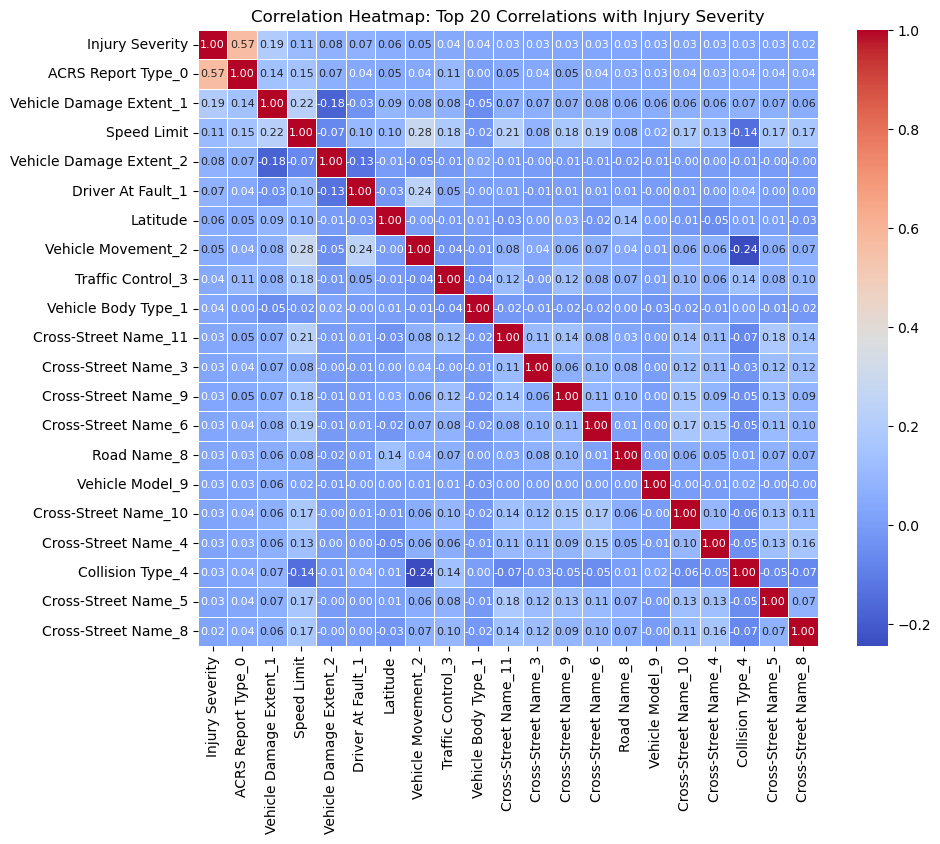

In [15]:
# 1.5.2 Correlation Heatmap

# Create heatmap of the top 20 correlations

top_20_columns = top_20_corr.index.tolist()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_crash_df[top_20_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, annot_kws={'size': 8}) 
plt.title('Correlation Heatmap: Top 20 Correlations with Injury Severity')
plt.show()

In [16]:
# 1.5.3 Count the number of unique values for the 'Injury Severity'

# Count the number of unique values for the 'Injury Severity' column
injury_severity_counts = encoded_crash_df['Injury Severity'].value_counts()

# Print the counts
print(injury_severity_counts)

Injury Severity
0    153847
1     18855
2     13703
3      1582
4       176
Name: count, dtype: int64


In [17]:
# 1.5.3. a) Make dataset smaller (entire dataset uses too much resoures on pc).

# Note: Using the entire dataset uses too much resoures on pc (ex: very long wait times when training a model, etc.)
# A smaller dataset was made to train each model.

# # Number of rows to take from each class (old)
# class_distribution = {
#     0: 988,  # NO APPARENT INJURY
#     1: 217,  # POSSIBLE INJURY
#     2: 186,  # SUSPECTED MINOR INJURY
#     3: 120,  # SUSPECTED SERIOUS INJURY
#     4: 84    # FATAL INJURY
# }

# Number of rows to take from each class
class_distribution = {
    0: 7584,  # NO APPARENT INJURY
    1: 1054,  # POSSIBLE INJURY
    2: 784,   # SUSPECTED MINOR INJURY
    3: 404,   # SUSPECTED SERIOUS INJURY
    4: 174    # FATAL INJURY
}

# Create an empty DataFrame to hold the selected rows
encoded_crash_df2 = pd.DataFrame()

# For each class (0, 1, 2, 3, 4), sample the specified number of rows from the original dataframe
for injury_severity, num_rows in class_distribution.items():
    # Filter the DataFrame for rows with the current injury severity class
    class_df = encoded_crash_df[encoded_crash_df['Injury Severity'] == injury_severity]
    
    # Sample the specified number of rows from the class DataFrame
    sampled_rows = class_df.sample(n=num_rows, random_state=1)  # Setting random_state for reproducibility
    
    # Concatenate the sampled rows to the new DataFrame
    encoded_crash_df2 = pd.concat([encoded_crash_df2, sampled_rows])

# Reset the index of the new DataFrame
encoded_crash_df2.reset_index(drop=True, inplace=True)

# Check the total number of rows and the class distribution in the new DataFrame
print(f"Total rows in encoded_crash_df2: {encoded_crash_df2.shape[0]}")
print(encoded_crash_df2['Injury Severity'].value_counts())


#class_weights1 = {0: 1, 1: 7, 2: 8, 3: 13, 4: 19}
class_weights2 = {0: 1, 1: 12, 2: 15, 3: 20, 4: 19}
print(class_weights2)

encoded_crash_df2.head()




Total rows in encoded_crash_df2: 10000
Injury Severity
0    7584
1    1054
2     784
3     404
4     174
Name: count, dtype: int64
{0: 1, 1: 12, 2: 15, 3: 20, 4: 19}


,ACRS Report Type_0,ACRS Report Type_1,Route Type_0,Route Type_1,Route Type_2,Route Type_3,Route Type_4,Road Name_0,Road Name_1,Road Name_2,...,Latitude,Longitude,Year,Month,Day,DayOfWeek,Hour,TimeOfDay_0,TimeOfDay_1,TimeOfDay_2
0,0,1,0,0,0,1,1,0,0,0,...,39.141915,-77.217761,2022,6,17,4,16,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,39.115426,-77.166018,2023,7,27,3,8,0,1,1
2,0,1,0,0,0,0,1,0,0,0,...,39.180976,-77.262479,2015,2,20,4,14,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,39.176928,-77.100741,2022,10,31,0,8,0,1,1
4,1,0,0,0,0,1,0,0,0,0,...,39.199528,-77.259858,2016,5,12,3,10,0,1,1


**Note**

The following Class Weights was be used to handle class imbalance:
- class_weights2 = {0: 1, 1: 12, 2: 15, 3: 20, 4: 19}
- Higher class weight was given to POSSIBLE INJURY (class 1), SUSPECTED MINOR INJURY (class 2) and SUSPECTED SERIOUS INJURY (class 3) as these three catergories get the lowest metrics from the classification reports (based on previous model fitting/training).
- Higher class weight was given to FATAL INJURY (class 4) due to having the lowest number entries.

In [18]:
# 1.6 Prepare Data, Split to X and y

# 'Injury Severity' will be target variable, y. 

# # Separate X and y
# X = encoded_crash_df.drop('Injury Severity',axis=1)
# y = encoded_crash_df['Injury Severity']


#(Separation)-------------------------------------Below is for smaller data frame----------------------------------------------------

# Separate X and y
X = encoded_crash_df2.drop('Injury Severity',axis=1)
y = encoded_crash_df2['Injury Severity']



#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the scaled data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (10000, 130)
y shape: (10000,)


**Final Columns/Features kept for prediction:**

<u>1. Crash Circumstances:</u>
- Crash Date/Time (converted to 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour', 'TimeOfDay'), Route Type, Road Name, Cross-Street Name, Weather, Surface Condition, Light, Traffic Control, Collision Type

<u>2. Driver Behavior & Risk Factors:</u>
- Driver At Fault, Driver Substance Abuse, Non-Motorist Substance Abuse, Driver Distracted By, Drivers License State 

<u>3. Vehicle Information:</u>
- Vehicle Body Type, Vehicle Movement, Vehicle Going Dir, Speed Limit, Vehicle Damage Extent, Vehicle Year, Vehicle Make, Vehicle Model 

<u>4. Location Data:</u>
- Latitude, Longitude

<u>5. High Correlation:</u>
- ACRS Report Type

**Chosen Target variable, y:** <br>
- 'Injury Severity' will be target variable y, as the model(s) will attempt to predict the Injury Severity based off five catergories. <br>

#### Part 2: Model 1, Logistic Regression

In [22]:
# 2 Logistic Regression

# 2.1 Logistic Regression: Split the data into training-testing data

from sklearn.model_selection import train_test_split

# 70% of data for training, set aside other 30% for validation and testing
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=1)

# Remaining 30% is divided equally into validation (15%) and test (15%) data
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)

# Check the shape of the resulting sets
print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): {X_OTHER.shape}, {y_OTHER.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")
print(f"Validation set shape (X_val, y_val): {X_val.shape}, {y_val.shape}")

# Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

Training set shape (X_train, y_train): (7000, 130), (7000,)
OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): (3000, 130), (3000,)
Testing set shape (X_test, y_test): (1500, 130), (1500,)
Validation set shape (X_val, y_val): (1500, 130), (1500,)


**Note:**<br>
X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

In [23]:
# Q2.2 Logistic Regression: Scale Data

from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the scaled data
print(f"Scaled training set shape: {scaled_X_train.shape}")
print(f"Scaled testing set shape: {scaled_X_test.shape}")
print(f"Scaled validation set shape: {scaled_X_val.shape}")

Scaled training set shape: (7000, 130)
Scaled testing set shape: (1500, 130)
Scaled validation set shape: (1500, 130)


**Why Logistic Regression should have scaled data:** <br>

Logistic Regression should have scaled data because it uses optimization methods to find the best solution, and if features are on different scales, it can slow down the process. <br>
Logistic Regression uses a linear decision boundary, and features with different scales can cause the model to behave poorly. <br>
When features are on different scales, the model might give more importance to features with larger values, skewing the results. <br>
Scaling ensures all features contribute equally to the model, improving its performance and convergence speed. <br>


In [25]:
# 2.3 Logistic Regression: Create and Train Model. Cross Validation with GridSearchCV.

# Long load time: keeping track of time
import time
# Start timer
start_time = time.time()

#(Separation)-------------------------------------Logistic Regression----------------------------------------------------

# From M2P08 Logistic Regression - Lecture 2, 3. GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Custom class weights
#class_weights1 = {0: 1, 1: 7, 2: 8, 3: 13, 4: 19}
class_weights2 = {0: 1, 1: 12, 2: 15, 3: 20, 4: 19}

log_reg = LogisticRegression(max_iter=10000, solver='saga', random_state=1, class_weight=class_weights2)


# GridSearch for Best Hyper-Parameters
# Main parameter choices are regularization penalty choice and regularization C value.

param_grid = {
    'C': np.logspace(-3, 3, 7),  
    'penalty': ['l2', 'elasticnet'],  
    'solver': ['saga', 'liblinear', 'newton-cg'],  
    'l1_ratio': [0.0, 0.5, 1.0]  # This is for elasticnet, controlling the balance between l1 and l2 penalties           
}

grid_model1 = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_model1.fit(scaled_X_train,y_train)               # Don't forget, it's "scaled_X_train", not "X_train"!!


# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_model1.best_params_}")

# Note: Long load time running GridSearchCV.

#(Separation)-------------------------------------------------------------------------------------------------

# End timer
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.4f} seconds")

Fitting 5 folds for each of 126 candidates, totalling 630 fits


C:\Users\delta\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
210 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\delta\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\delta\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\delta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver 

Best parameters: {'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l2', 'solver': 'liblinear'}
Execution time: 4896.3379 seconds


In [26]:
# 2.4 Logistic Regression: Fit best model.

# Make log model based off of the grid model's best estimator.
log_model = grid_model1.best_estimator_

log_model

# Note: The grid_model.best_estimator_ will use the best parameters found by grid_model.best_params_ during the GridSearchCV process.
# So log_model = grid_model.best_estimator_ will have best parameters as per grid_model.best_params_.

LogisticRegression(class_weight={0: 1, 1: 12, 2: 15, 3: 20, 4: 19},
                   l1_ratio=0.0, max_iter=10000, random_state=1,
                   solver='liblinear')

In [27]:
# 2.4 Logistic Regression: Save Model

# 2.4.a) Save Logistic Regression Model

# From M2P02-Linear_Regression-main, Lecture 2, 2.7 Model Deployment

from joblib import dump

# Eport model

dump(log_model, 'M4P03_log_model.joblib') 

['M4P03_log_model.joblib']

In [28]:
# 2.4 Logistic Regression: Load Model

# # 2.4.b) Load Logistic Regression Model

# from joblib import load

# log_model = load('M4P03_log_model.joblib')


In [29]:
# 2.5 Logistic Regression: Evaluation: Confusion Matrix and Classification report

# 2.5.a) Logistic Regression: y_pred array

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Confusion Matrix

from sklearn.metrics import confusion_matrix

y_pred = log_model.predict(scaled_X_test)         # Don't forget, it's "scaled_X_test", not "X_test"!!

y_pred

array([0, 3, 0, ..., 0, 4, 0], dtype=int64)

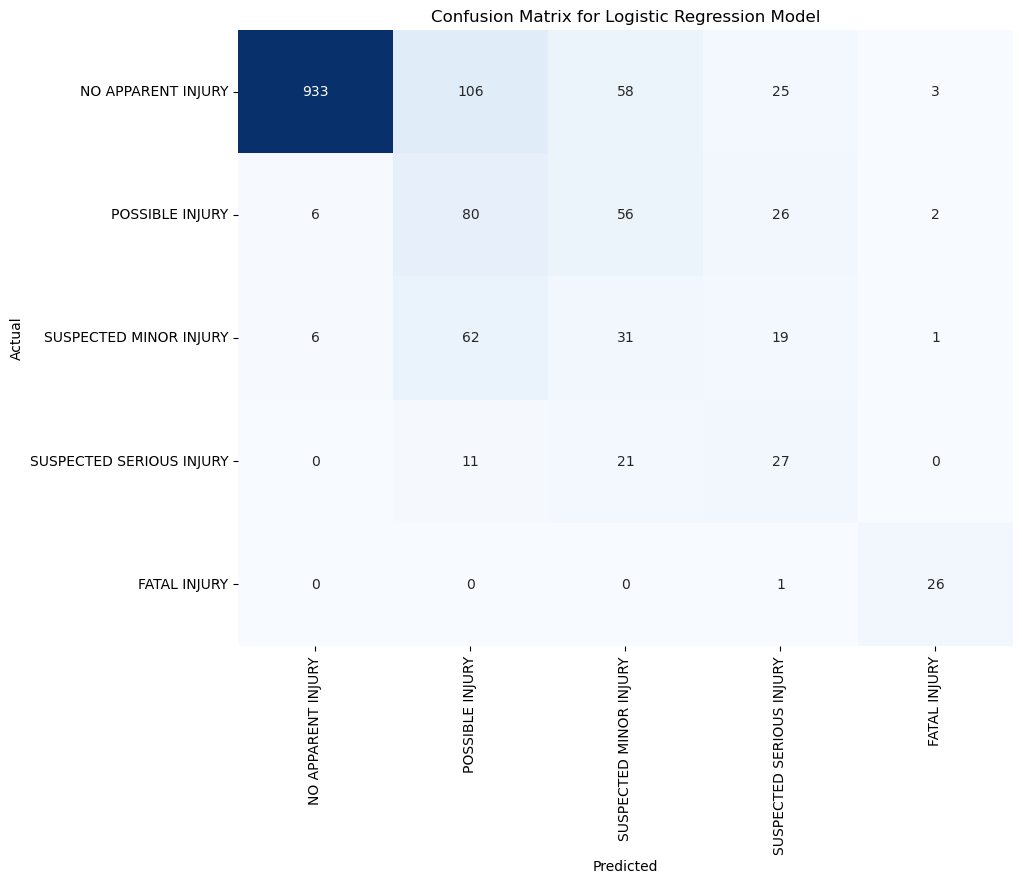

In [30]:
# 2.5.b) Logistic Regression: Confusion Matrix

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# List of class labels
class_labels = ['NO APPARENT INJURY', 'POSSIBLE INJURY', 'SUSPECTED MINOR INJURY', 
                'SUSPECTED SERIOUS INJURY', 'FATAL INJURY']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)

plt.title("Confusion Matrix for Logistic Regression Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")


# Show the plot
plt.show()

In [31]:
# 2.5.c) Logistic Regression: Classification report

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Classification Report

from sklearn.metrics import classification_report

# Generating the classification report
class_report1 = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)

# Convert the classification report dictionary to a DataFrame
class_report1_df = pd.DataFrame(class_report1).transpose()

# Display the classification report in a nicely formatted DataFrame
print("Classification report for the Logistic Regression Model.")

#print(class_report1_df)

class_report1_df

Classification report for the Logistic Regression Model.


,precision,recall,f1-score,support
NO APPARENT INJURY,0.987302,0.829333,0.901449,1125.000000
POSSIBLE INJURY,0.308880,0.470588,0.372960,170.000000
SUSPECTED MINOR INJURY,0.186747,0.260504,0.217544,119.000000
SUSPECTED SERIOUS INJURY,0.275510,0.457627,0.343949,59.000000
FATAL INJURY,0.812500,0.962963,0.881356,27.000000
accuracy,0.731333,0.731333,0.731333,0.731333
macro avg,0.514188,0.596203,0.543452,1500.000000
weighted avg,0.815760,0.731333,0.765007,1500.000000


#### Part 3: Model 2, Support Vector Classification (SVC)

In [63]:
# 3. Support Vector Classification (SVC)

# 3.1 Support Vector Classification (SVC): Split the data into training-testing data

from sklearn.model_selection import train_test_split

# 70% of data for training, set aside other 30% for validation and testing
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=1)

# Remaining 30% is divided equally into validation (15%) and test (15%) data
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the resulting sets
print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): {X_OTHER.shape}, {y_OTHER.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")
print(f"Validation set shape (X_val, y_val): {X_val.shape}, {y_val.shape}")

#Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

Training set shape (X_train, y_train): (7000, 130), (7000,)
OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): (3000, 130), (3000,)
Testing set shape (X_test, y_test): (1500, 130), (1500,)
Validation set shape (X_val, y_val): (1500, 130), (1500,)


**Note:**<br>
X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

In [65]:
# Q3.2 Support Vector Classification (SVC): Scale Data

from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the scaled data
print(f"Scaled training set shape: {scaled_X_train.shape}")
print(f"Scaled testing set shape: {scaled_X_test.shape}")
print(f"Scaled validation set shape: {scaled_X_val.shape}")

Scaled training set shape: (7000, 130)
Scaled testing set shape: (1500, 130)
Scaled validation set shape: (1500, 130)


**Why SVC should have scaled data:** 

SVC (Support Vector Classification) is sensitive to the scale of the input features because it relies on calculating distances between data points. <br>
If features have different scales, the model may give more importance to the features with larger ranges, leading to biased results.  
Scaling the data ensures that each feature contributes equally to the model's decision-making process, improving performance.

In [71]:
# 3.3 Support Vector Classification (SVC): Create SVC model. Cross-Validation with GridSearchCV. 


# Long load time: keeping track of time
import time
# Start timer
start_time = time.time()

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Custom class weights
#class_weights1 = {0: 1, 1: 7, 2: 8, 3: 13, 4: 19}
class_weights2 = {0: 1, 1: 12, 2: 15, 3: 20, 4: 19}

# Initialize the SVC model
svc = SVC(class_weight=class_weights2)

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],         
    'kernel': ['linear', 'rbf'],   
    'gamma': ['scale', 'auto'],     
}


# Initialize GridSearchCV
grid_model2 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_model2.fit(scaled_X_train, y_train) 


# Get the best hyperparameters
print(f"Best hyperparameters: {grid_model2.best_params_}")


#(Separation)---------------------------------------------------------------------------------------------

# End timer
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.4f} seconds")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Execution time: 5735.0073 seconds


In [73]:
# 3.4 Support Vector Classification (SVC): Fit best model

svc_model = grid_model2.best_estimator_
svc_model

# Note: The grid_model.best_estimator_ will use the best parameters found by grid_model.best_params_ during the GridSearchCV process.

SVC(C=10, class_weight={0: 1, 1: 12, 2: 15, 3: 20, 4: 19})

In [75]:
# 3.4 Support Vector Classification (SVC): Save Model

# 3.4.a) Save Support Vector Classification (SVC) Model

# From M2P02-Linear_Regression-main, Lecture 2, 2.7 Model Deployment

from joblib import dump

# Eport model

dump(svc_model, 'M4P03_svc_model.joblib') 

['M4P03_svc_model.joblib']

In [ ]:
# 3.4 Support Vector Classification (SVC): Load Model

# # 3.4.b) Load Support Vector Classification (SVC) Model

# from joblib import load

# svc_model = load('M4P03_svc_model.joblib')


In [77]:
# 3.5 Support Vector Classification (SVC): Evaluation: Confusion Matrix and Classification report

# 3.5.a) Support Vector Classification (SVC): y_pred array

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Confusion Matrix

from sklearn.metrics import confusion_matrix

y_pred = svc_model.predict(scaled_X_test)         # Don't forget, it's "scaled_X_test", not "X_test"!!

y_pred

array([0, 0, 0, ..., 0, 4, 0], dtype=int64)

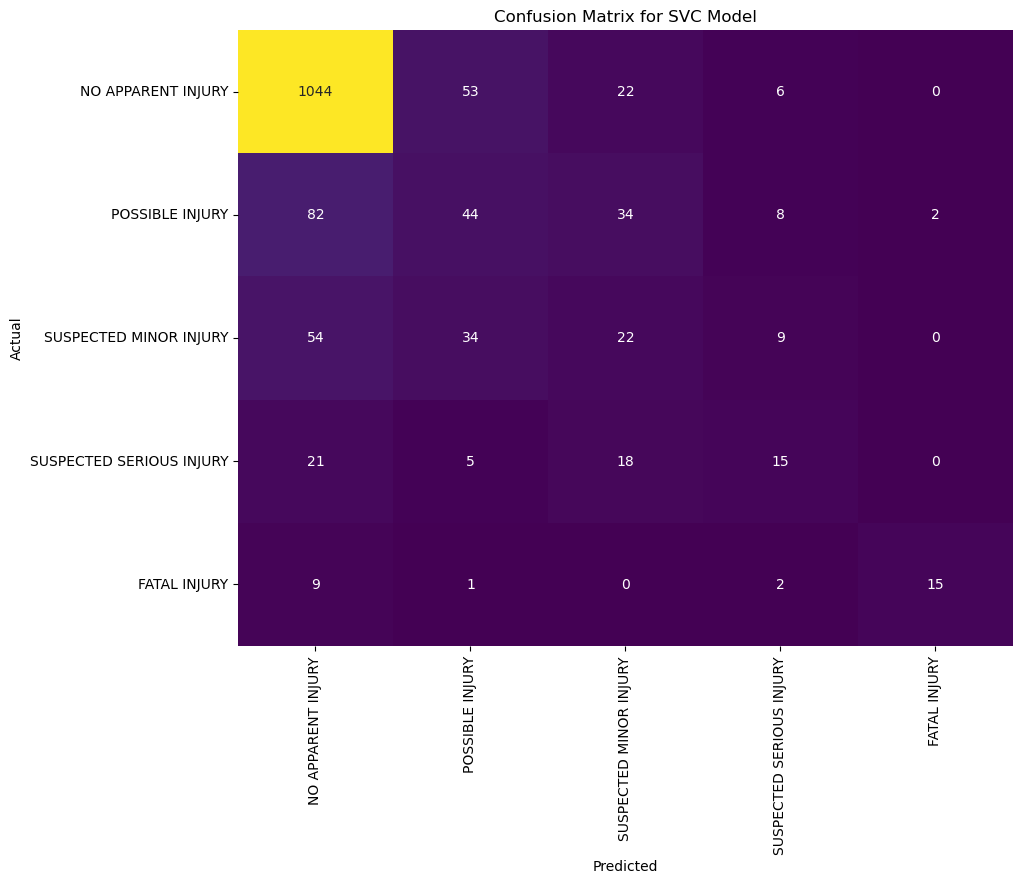

In [79]:
# 3.5.b) Support Vector Classification (SVC): Confusion Matrix

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# List of class labels
class_labels = ['NO APPARENT INJURY', 'POSSIBLE INJURY', 'SUSPECTED MINOR INJURY', 
                'SUSPECTED SERIOUS INJURY', 'FATAL INJURY']

# Display the confusion matrix using seaborn heatmap with a different colormap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for SVC Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [81]:
# 3.5.c) Support Vector Classification (SVC): Classification report

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Classification Report

from sklearn.metrics import classification_report

# Generating the classification report
class_report2 = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)

# Convert the classification report dictionary to a DataFrame
class_report2_df = pd.DataFrame(class_report2).transpose()

# Display the classification report in a DataFrame
print("Classification report for the SVC Model.")

#print(class_report2)
class_report2_df


Classification report for the SVC Model.


,precision,recall,f1-score,support
NO APPARENT INJURY,0.862810,0.928000,0.894218,1125.00
POSSIBLE INJURY,0.321168,0.258824,0.286645,170.00
SUSPECTED MINOR INJURY,0.229167,0.184874,0.204651,119.00
SUSPECTED SERIOUS INJURY,0.375000,0.254237,0.303030,59.00
FATAL INJURY,0.882353,0.555556,0.681818,27.00
accuracy,0.760000,0.760000,0.760000,0.76
macro avg,0.534099,0.436298,0.474073,1500.00
weighted avg,0.732319,0.760000,0.743578,1500.00


#### Part 4: Model 3, Random Forest Classification

In [19]:
# 4. Random Forest Classification

# 4.1 Random Forest Classification: Split the data into training-testing data

from sklearn.model_selection import train_test_split

# 70% of data for training, set aside other 30% for validation and testing
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=1)

# Remaining 30% is divided equally into validation (15%) and test (15%) data
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the resulting sets
print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): {X_OTHER.shape}, {y_OTHER.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")
print(f"Validation set shape (X_val, y_val): {X_val.shape}, {y_val.shape}")


# Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

#(Separation)--------------------Random Forest Classification not requiring scaling-------------------------------
# Random Forest does not require data to be scaled because it builds decision trees that split data based on feature thresholds, 
# which are not affected by the scale of the features.

Training set shape (X_train, y_train): (7000, 130), (7000,)
OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): (3000, 130), (3000,)
Testing set shape (X_test, y_test): (1500, 130), (1500,)
Validation set shape (X_val, y_val): (1500, 130), (1500,)


**Random Forest Classification not requiring scaling:** <br>

Random Forest does not require data to be scaled because it builds decision trees that split data based on feature values, which are not affected by the scale of the features. <br>
Each tree in the forest makes decisions by comparing values of individual features, so the model is not sensitive to the scale of the features. <br>
Random Forest can handle features with different scales without affecting the model's performance. <br>

In [51]:
# 4.2 Random Forest Classification: Create model. Cross-Validation with GridSearchCV. 

# Long load time: keeping track of time
import time
# Start timer
start_time = time.time()


# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Custom class weights
#class_weights1 = {0: 1, 1: 7, 2: 8, 3: 13, 4: 19}
class_weights2 = {0: 1, 1: 12, 2: 15, 3: 20, 4: 19}

# Create instance of Random Forest model with class weights 
# "rfc" for Random Forest Classification
rfc = RandomForestClassifier(random_state=1, class_weight=class_weights2)

# Parameter grid for Random Forest
# See link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
param_grid = {
    'n_estimators': [100, 200, 300],               # Number of trees in the forest
    'max_depth': [None, 10, 20],                   # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],              # The number of features to consider for the best split
    'bootstrap': [True]                            # Using bootstrap samples          
}

# Initialize GridSearchCV (and Random Forest) fit GridSearchCV
grid_model3 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_model3.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_model3.best_params_}")

# Note: Long load time.

#(Separation)---------------------------------------------------------------------------------------------

# End timer
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.4f} seconds")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Execution time: 84.5988 seconds


In [53]:
# 4.3 Random Forest Classification: Fit best model

rfc_model = grid_model3.best_estimator_
rfc_model

# Note: The grid_model.best_estimator_ will use the best parameters found by grid_model.best_params_ during the GridSearchCV process.

RandomForestClassifier(class_weight={0: 1, 1: 12, 2: 15, 3: 20, 4: 19},
                       random_state=1)

In [55]:
# 4.3 Random Forest Classification: Save Model

# 4.3.a) Save Random Forest Classification Model

# From M2P02-Linear_Regression-main, Lecture 2, 2.7 Model Deployment

from joblib import dump

# Eport model

dump(rfc_model, 'M4P03_rfc_model.joblib') 

['M4P03_rfc_model.joblib']

In [21]:
# 3.4 Random Forest Classification: Load Model

# # 4.3.b) Load Random Forest Classification Model

# from joblib import load

# rfc_model = load('M4P03_rfc_model.joblib')

In [26]:
# 4.4 Random Forest Classification: Evaluation: Confusion Matrix and Classification report

# 4.4.a) Random Forest Classification: y_pred array

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Confusion Matrix

from sklearn.metrics import confusion_matrix

y_pred = rfc_model.predict(X_test)         # Don't forget, there is no "scaled_X_test", it is "X_test"!!
                                           # No scaling required for Random Forest.
y_pred

array([0, 0, 0, ..., 0, 4, 0], dtype=int64)

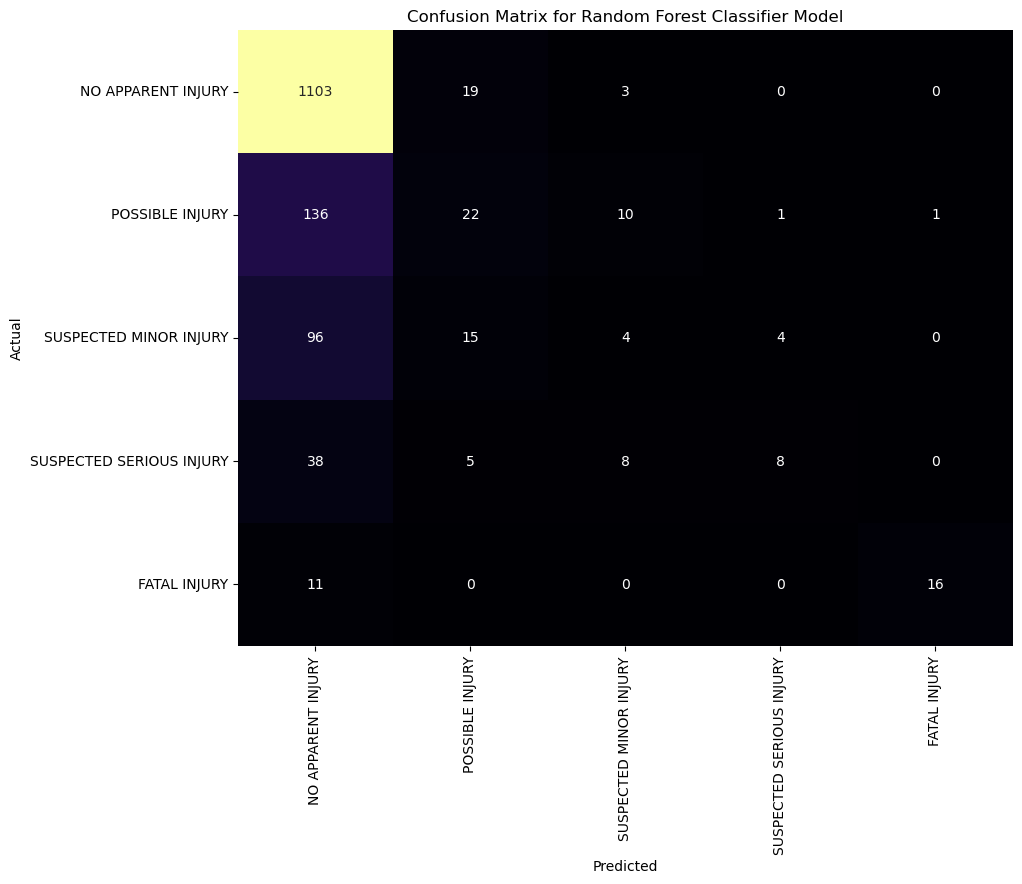

In [59]:
# 4.4.b) Random Forest Classification: Confusion Matrix

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# List of class labels
class_labels = ['NO APPARENT INJURY', 'POSSIBLE INJURY', 'SUSPECTED MINOR INJURY', 
                'SUSPECTED SERIOUS INJURY', 'FATAL INJURY']

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='inferno', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for Random Forest Classifier Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [27]:
# 4.4.c) Random Forest Classification: Classification report

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Classification Report

from sklearn.metrics import classification_report

# Generating the classification report
class_report3 = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)

# Convert the classification report dictionary to a DataFrame
class_report3_df = pd.DataFrame(class_report3).transpose()

# Display the classification report in a DataFrame
print("Classification report for the Random Forest Classification Model.")

#print(class_report3)
class_report3_df

Classification report for the Random Forest Classification Model.


,precision,recall,f1-score,support
NO APPARENT INJURY,0.796965,0.980444,0.879235,1125.000000
POSSIBLE INJURY,0.360656,0.129412,0.190476,170.000000
SUSPECTED MINOR INJURY,0.160000,0.033613,0.055556,119.000000
SUSPECTED SERIOUS INJURY,0.615385,0.135593,0.222222,59.000000
FATAL INJURY,0.941176,0.592593,0.727273,27.000000
accuracy,0.768667,0.768667,0.768667,0.768667
macro avg,0.574836,0.374331,0.414952,1500.000000
weighted avg,0.692438,0.768667,0.707252,1500.000000


#### Part 5: Final Model

In [89]:
#5 Final Model

#5.1.a Final model: Comparing classification reports with Logistic Regression Model, SVC Model and Random Forest Model.
# For Precision, Recall, F1-Score, Support

import pandas as pd

# Create a list of the dictionaries containing the classification reports for each model
class_reports = {
    'Logistic Regression': class_report1,
    'SVC': class_report2,
    'Random Forest': class_report3
}

# Initialize an empty list to store the rows of the combined report
combined_report_rows = []

# Extract and format the classification report for each model
for model_name, report in class_reports.items():
    # Extract precision, recall, f1-score, and support for each class
    model_metrics = {
        'Class': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': [],
        'Support': [],
    }

    for class_name, metrics in report.items():
        # Skip the average rows (macro avg, weighted avg, accuracy)
        if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
            model_metrics['Class'].append(class_name)
            model_metrics['Precision'].append(metrics['precision'])
            model_metrics['Recall'].append(metrics['recall'])
            model_metrics['F1-Score'].append(metrics['f1-score'])
            model_metrics['Support'].append(metrics['support'])

    # Convert the metrics to DataFrame for each model and append to the combined list
    df = pd.DataFrame(model_metrics)
    df['Model'] = model_name  # Add a 'Model' column to differentiate between models
    combined_report_rows.append(df)

# Concatenate all DataFrames into a single one
class_reports_df = pd.concat(combined_report_rows, ignore_index=True)

# Pivot the DataFrame to display each metric for each model side by side
class_reports_df = class_reports_df.pivot_table(index=['Class'], 
                                                columns=['Model'], 
                                                values=['Precision', 'Recall', 'F1-Score', 'Support'], 
                                                aggfunc='first')

# Reorder the columns to follow the order: Precision, Recall, F1-Score, Support
class_reports_df = class_reports_df[['Precision', 'Recall', 'F1-Score', 'Support']]

# Reorder the index to show the classes in the specified order
class_reports_df = class_reports_df.reindex(
    ['NO APPARENT INJURY', 'POSSIBLE INJURY', 'SUSPECTED MINOR INJURY', 'SUSPECTED SERIOUS INJURY', 'FATAL INJURY']
)

# Display the final combined report without the accuracy column
class_reports_df


#(Seperation)---------------------Classification report definitions-----------------------------------------------------------

# Precision:
# Precision = True Positives/(True Positives + False Positives)

# Recall:
# Recall = True Positives/(True Positives + False Negatives)

# F1-score:
# F1-score = 2*[(Precision*Recall)/(Precision+Recall)]

# Accuracy:
# Accuracy = (True Positives + True Negatives)/(Total Number of Instances)

Precision                          \
Model                    Logistic Regression Random Forest       SVC   
Class                                                                  
NO APPARENT INJURY                  0.987302      0.796965  0.862810   
POSSIBLE INJURY                     0.308880      0.360656  0.321168   
SUSPECTED MINOR INJURY              0.186747      0.160000  0.229167   
SUSPECTED SERIOUS INJURY            0.275510      0.615385  0.375000   
FATAL INJURY                        0.812500      0.941176  0.882353   

                                      Recall                          \
Model                    Logistic Regression Random Forest       SVC   
Class                                                                  
NO APPARENT INJURY                  0.829333      0.980444  0.928000   
POSSIBLE INJURY                     0.470588      0.129412  0.258824   
SUSPECTED MINOR INJURY              0.260504      0.033613  0.184874   
SUSPECTED SERIOUS INJURY            0.457627      0.135593  0.254237   
FATAL INJURY                        0.962963      0.592593  0.555556   

                                    F1-Score                          \
Model                    Logistic Regression Random Forest       SVC   
Class                                                                  
NO APPARENT INJURY                  0.901449      0.879235  0.894218   
POSSIBLE INJURY                     0.372960      0.190476  0.286645   
SUSPECTED MINOR INJURY              0.217544      0.055556  0.204651   
SUSPECTED SERIOUS INJURY            0.343949      0.222222  0.303030   
FATAL INJURY                        0.881356      0.727273  0.681818   

                                     Support                        
Model                    Logistic Regression Random Forest     SVC  
Class                                                               
NO APPARENT INJURY                    1125.0        1125.0  1125.0  
POSSIBLE INJURY                        170.0         170.0   170.0  
SUSPECTED MINOR INJURY                 119.0         119.0   119.0  
SUSPECTED SERIOUS INJURY                59.0          59.0    59.0  
FATAL INJURY                            27.0          27.0    27.0

**Comments for classification reports for Logistic Regression Model, SVC Model and Random Forest Model (for Precision, Recall and F1-Score):**
- Noticed that the Precision, Recall and F1-Score are quite low for POSSIBLE INJURY (Class 1), SUSPECTED MINOR INJURY (Class 2) and SUSPECTED SERIOUS INJURY (Class 3).
- Noticed that the Precision, Recall and F1-Score are higher for NO APPARENT INJURY (Class 0) and FATAL INJURY (Class 4).
- Despite including class weights, the metrics for POSSIBLE INJURY (Class 1), SUSPECTED MINOR INJURY (Class 2) and SUSPECTED SERIOUS INJURY (Class 3) were still low. As a future possible improvement, consider using higher class weights for these classes.

In [91]:
#5.1.b Final model: Comparing classification reports with Logistic Regression Model, SVC Model and Random Forest Model.
# For 'macro avg', 'weighted avg'

import pandas as pd

# Extracting relevant information (macro avg and weighted avg) for Precision, Recall, and F1-Score from each class report
average_report_data = {
    'Metric': ['precision', 'recall', 'f1-score'],
    'Logistic Regression - macro avg': [
        class_report1['macro avg']['precision'], 
        class_report1['macro avg']['recall'], 
        class_report1['macro avg']['f1-score']
    ],
    'SVC - macro avg': [
        class_report2['macro avg']['precision'], 
        class_report2['macro avg']['recall'], 
        class_report2['macro avg']['f1-score']
    ],
    'Random Forest - macro avg': [
        class_report3['macro avg']['precision'], 
        class_report3['macro avg']['recall'], 
        class_report3['macro avg']['f1-score']
    ],
    'Logistic Regression - weighted avg': [
        class_report1['weighted avg']['precision'], 
        class_report1['weighted avg']['recall'], 
        class_report1['weighted avg']['f1-score']
    ],
    'SVC - weighted avg': [
        class_report2['weighted avg']['precision'], 
        class_report2['weighted avg']['recall'], 
        class_report2['weighted avg']['f1-score']
    ],
    'Random Forest - weighted avg': [
        class_report3['weighted avg']['precision'], 
        class_report3['weighted avg']['recall'], 
        class_report3['weighted avg']['f1-score']
    ]
}

# Create a DataFrame from the extracted data
average_report_df = pd.DataFrame(average_report_data)

# Set the 'Metric' column as the index
average_report_df.set_index('Metric', inplace=True)

# Display the new DataFrame with the macro avg and weighted avg for Precision, Recall, and F1-Score
average_report_df

,Logistic Regression - macro avg,SVC - macro avg,Random Forest - macro avg,Logistic Regression - weighted avg,SVC - weighted avg,Random Forest - weighted avg
Metric,,,,,,
precision,0.514188,0.534099,0.574836,0.815760,0.732319,0.692438
recall,0.596203,0.436298,0.374331,0.731333,0.760000,0.768667
f1-score,0.543452,0.474073,0.414952,0.765007,0.743578,0.707252


In [93]:
#5.1.c Final model: Comparing classification reports with Logistic Regression Model, SVC Model and Random Forest Model.
# For 'accuracy'

import pandas as pd

# Extracting accuracy information from each class report
accuracy_data = {
    'Metric': ['accuracy'],
    'Logistic Regression': [class_report1['accuracy']],
    'SVC': [class_report2['accuracy']],
    'Random Forest': [class_report3['accuracy']]
}

# Create a DataFrame from the extracted accuracy data
accuracy_df = pd.DataFrame(accuracy_data)

# Set the 'Metric' column as the index
accuracy_df.set_index('Metric', inplace=True)

# Display the accuracy DataFrame
accuracy_df


#(Seperation)---------------------Classification report definitions-----------------------------------------------------------

# Accuracy:
# Accuracy = (True Positives + True Negatives)/(Total Number of Instances)

,Logistic Regression,SVC,Random Forest
Metric,,,
accuracy,0.731333,0.76,0.768667


**Random Forest Classification has the highest accuracy**

**Reasons for Random Forest Classification having highest accuracy**
- Random Forest uses multiple decision trees, which helps improve accuracy by averaging their predictions.
- It can capture complex patterns in the data better than simpler models like Logistic Regression.
- Random Forest automatically identifies the most important features, focusing on what matters most for predictions.

**Random Forest Classification was chosen as the Final Model**

In [23]:
#5.2 Final model: Evaluation and classification report with holdout data

#5.2.a Final model: Evaluation and classification report with holdout data

# List of class labels
class_labels = ['NO APPARENT INJURY', 'POSSIBLE INJURY', 'SUSPECTED MINOR INJURY', 
                'SUSPECTED SERIOUS INJURY', 'FATAL INJURY']

# Random Forest Classifier chosen as the final model.
final_model = rfc_model

# Using holdout data
y_val_pred = final_model.predict(X_val)       # No "scaled_X_val" or no scaling required for Random Forest

from sklearn.metrics import classification_report

# Generating the classification report of final model with holdout data
class_report4 = classification_report(y_val, y_val_pred, target_names=class_labels, output_dict=True)

# Convert the classification report dictionary to a DataFrame
class_report4_df = pd.DataFrame(class_report4).transpose()

# Display the classification report in a DataFrame
print("Classification report for the Final Model for holdout data.")

#print(class_report4)
class_report4_df

Classification report for the Final Model for holdout data.


,precision,recall,f1-score,support
NO APPARENT INJURY,0.823571,0.984629,0.896927,1171.000000
POSSIBLE INJURY,0.333333,0.109677,0.165049,155.000000
SUSPECTED MINOR INJURY,0.320000,0.080808,0.129032,99.000000
SUSPECTED SERIOUS INJURY,0.571429,0.081633,0.142857,49.000000
FATAL INJURY,1.000000,0.653846,0.790698,26.000000
accuracy,0.799333,0.799333,0.799333,0.799333
macro avg,0.609667,0.382119,0.424913,1500.000000
weighted avg,0.734499,0.799333,0.744144,1500.000000


In [28]:
#5.2.b) Final model: Comparing classification report results for chosen model: test data against holdout data
# Only for precision, recall, f1-score 	

import pandas as pd

# Create a list of the dictionaries containing the classification reports for each model
class_reports = {
    'Random Forest (Test Data)': class_report3,        # Chosen model with test data
    'Final Model (Holdout Data)': class_report4        # Final model on holdout data
}

# Initialize an empty list to store the rows of the combined report
combined_report_rows = []

# Extract and format the classification report for each model
for model_name, report in class_reports.items():
    # Extract precision, recall, f1-score, and support for each class
    model_metrics = {
        'Class': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': [],
        'Support': [],
    }

    for class_name, metrics in report.items():
        
        if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
            model_metrics['Class'].append(class_name)
            model_metrics['Precision'].append(metrics['precision'])
            model_metrics['Recall'].append(metrics['recall'])
            model_metrics['F1-Score'].append(metrics['f1-score'])
            model_metrics['Support'].append(metrics['support'])

    # Convert the metrics to DataFrame for each model and append to the combined list
    df = pd.DataFrame(model_metrics)
    df['Model'] = model_name  # Add a 'Model' column to differentiate between models
    combined_report_rows.append(df)

# Concatenate all DataFrames into a single one
class_reports2_df = pd.concat(combined_report_rows, ignore_index=True)

# Pivot the DataFrame to display each metric for each model side by side
class_reports2_df = class_reports2_df.pivot_table(index=['Class'], 
                                                  columns=['Model'], 
                                                  values=['Precision', 'Recall', 'F1-Score', 'Support'], 
                                                  aggfunc='first')

# Reorder the columns to follow the order: Precision, Recall, F1-Score, Support
class_reports2_df = class_reports2_df[['Precision', 'Recall', 'F1-Score', 'Support']]

# Reorder the index to show the classes in the specified order
class_reports2_df = class_reports2_df.reindex(
    ['NO APPARENT INJURY', 'POSSIBLE INJURY', 'SUSPECTED MINOR INJURY', 'SUSPECTED SERIOUS INJURY', 'FATAL INJURY']
)

# Display the final combined report without the accuracy column
class_reports2_df


Precision                            \
Model                    Final Model (Holdout Data) Random Forest (Test Data)   
Class                                                                           
NO APPARENT INJURY                         0.823571                  0.796965   
POSSIBLE INJURY                            0.333333                  0.360656   
SUSPECTED MINOR INJURY                     0.320000                  0.160000   
SUSPECTED SERIOUS INJURY                   0.571429                  0.615385   
FATAL INJURY                               1.000000                  0.941176   

                                             Recall                            \
Model                    Final Model (Holdout Data) Random Forest (Test Data)   
Class                                                                           
NO APPARENT INJURY                         0.984629                  0.980444   
POSSIBLE INJURY                            0.109677                  0.129412   
SUSPECTED MINOR INJURY                     0.080808                  0.033613   
SUSPECTED SERIOUS INJURY                   0.081633                  0.135593   
FATAL INJURY                               0.653846                  0.592593   

                                           F1-Score                            \
Model                    Final Model (Holdout Data) Random Forest (Test Data)   
Class                                                                           
NO APPARENT INJURY                         0.896927                  0.879235   
POSSIBLE INJURY                            0.165049                  0.190476   
SUSPECTED MINOR INJURY                     0.129032                  0.055556   
SUSPECTED SERIOUS INJURY                   0.142857                  0.222222   
FATAL INJURY                               0.790698                  0.727273   

                                            Support                            
Model                    Final Model (Holdout Data) Random Forest (Test Data)  
Class                                                                          
NO APPARENT INJURY                           1171.0                    1125.0  
POSSIBLE INJURY                               155.0                     170.0  
SUSPECTED MINOR INJURY                         99.0                     119.0  
SUSPECTED SERIOUS INJURY                       49.0                      59.0  
FATAL INJURY                                   26.0                      27.0

**Results of Cross-validation (with GridsearchCV):** <br>
- With Cross-validation (with GridsearchCV), the metric results of the testing data for Random Forest Classification is similar to the metric results of the holdout data for Random Forest Classification, with the exception of 'SUSPECTED MINOR INJURY' where the metrics were higher with the holdout data when comparing with the test data.

In [29]:
#5.2.c) Final model: Comparing classification report results for chosen model: test data against holdout data
# Only for accuracy

import pandas as pd

# Extracting accuracy information from Final Model's Test Data and Final Model's Holdout Data
accuracy_data = {
    'Metric': ['accuracy'],
    'Random Forest (Test Data)': [class_report3['accuracy']],
    'Final Model (Holdout Data)': [class_report4['accuracy']]
}

# Create a DataFrame from the extracted accuracy data
accuracy2_df = pd.DataFrame(accuracy_data)

# Set the 'Metric' column as the index
accuracy2_df.set_index('Metric', inplace=True)

# Display the accuracy DataFrame
accuracy2_df

,Random Forest (Test Data),Final Model (Holdout Data)
Metric,,
accuracy,0.768667,0.799333


**Comparison of the accuracy (from classification report) between the Test data and Holdout data:**

- With Cross-validation (with GridsearchCV), the accuracy of the testing data for Random Forest Classification is almost similar to the accuracy of the holdout data for Random Forest Classification, with the holdout data having slightly higher accuracy over the test data.

In [103]:
#5.3 Final model: Fit Final Model

# Fitting X and y with 100% of the data.
final_model.fit(X, y)

RandomForestClassifier(class_weight={0: 1, 1: 12, 2: 15, 3: 20, 4: 19},
                       random_state=1)

In [105]:
#5.4 Final model: Prediction

#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()                           
         
# Select the first row of X_train and modify it
new_data_input = X_train.iloc[0:1].copy()
new_data_input['ACRS Report Type_0'] = 0
new_data_input['ACRS Report Type_1'] = 1
new_data_input['Vehicle Damage Extent_1'] = 1
new_data_input['Speed Limit'] = 40
new_data_input['Driver At Fault_1'] = 1

# Scale the modified sample
#new_data_input_scaled = scaler.fit_transform(new_data_input)

# Note: Random Forest does not require scaled data, "new_data_input" will not be scaled.


# Use the trained model to make a prediction on the scaled input
prediction = final_model.predict(new_data_input)

# Display the prediction result
print(f"Prediction for the new data input: {prediction}")


# Classes and their mapped number:

# 'FATAL INJURY': 4,
# 'SUSPECTED SERIOUS INJURY': 3,
# 'SUSPECTED MINOR INJURY': 2,
# 'POSSIBLE INJURY': 1,
# 'NO APPARENT INJURY': 0


Prediction for the new data input: [0]


**Result of Prediction:**

From new_data_input (data frame) as input, the Random Forest Classification Model was able to provide a prediction for 'Injury Severity'.

In [107]:
# 5.5 Final model: Model Deployment 

# 5.5.1 Final model: Save the trained model using joblib 

# From M2P02-Linear_Regression-main, Lecture 2, 2.7 Model Deployment

from joblib import dump, load

# Eport model

dump(final_model, 'M4P03_final_model.joblib') 

['M4P03_final_model.joblib']

In [109]:
# 5.5.2 Final model: Load model

# Load model
loaded_model = load('M4P03_final_model.joblib')


In [111]:
# 5.5.3 Final model: Make prediction with Loaded Model

# Make prediction with loaded model
loaded_model.predict(new_data_input)

# The final model was loaded and successfully made a prediction (for verification).

array([0], dtype=int64)

**Saved Final Model, Final Model to be used for Deployment (Streamlit):**

- The final model ('M4P03_final_model.joblib') was saved and was used for deployment for a Streamlit app.
- The app (M4P03_app.py file) will use the final model to make a prediction.

<u>URLs for Streamlit app:</u> <br>
Local URL: http://localhost:8501 <br>
Network URL: http://10.0.0.201:8501 <br>


## Conclusion 
In conclusion, three models were tested: Logistic Regression, Support Vector Classification (SVC) and Random Forest Classification. <br>
**Of the three models, the Random Forest Classification model had the best performance as it had the highest accuracy. The Random Forest Classification model was chosen as the final model.** <br>

- For chosen features (applied to final model, Random Forest Classification): features related to Crash Circumstances (ex: Weather, etc.), Driver Behavior & Risk Factors (ex: Driver At Fault, etc.), Vehicle Information (ex: Vehicle Damage Extent), Location Data (ex: Latitude, etc.) and High Correlation (ex: ACRS Report Type) were chosen as they could influence the Injury Severity. <br>
- The features underwent various preprocessing and feature engineering techniques to enhance their suitability for model prediction. (ex: Made all objects/strings upper case to avoid duplicates, etc.)
- Cross-validation (with GridSearchCV) was used as a validation scheme. Cross-validation was used to evaluate the holdout data for the final model, and has almost similar results/metrics with the test data. <br>
- All three classification models required the data to be converted into numerical format hence the use of encoding. Binary Encoder was used was used on all applicable features (which were originally objects/strings) to convert their values to be numerical. <br>
- Mapping was used for 'Injury Severity' to convert their values to be numerical. <br> 
- With what was stated above, the final model (Random Forest Classification) had the encoding feature BinaryEncoder to convert the feature values to be numerical. This encoder was applied as part of feature engineering for the final model. <br>  
- Continuing with feature engineering, scaling was not applied on the data for the final model (Random Forest Classification), as it was not necessary for the Random Forest model. <br>
- As per prediction experimentation, with "new_data_input" (data frame)" as input, the Random Forest Classification Model was able to provide a prediction of the Injury Severity. <br>
- The final model was saved as a joblib file (as 'M4P03_final_model.joblib'). After loading the final model, the final model ('M4P03_final_model.joblib') was able to make a prediction. <br>
- The final model ('M4P03_final_model.joblib') was used for deployment as a Streamlit app and was able to make a prediction.

### End